#stochastic gradient descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.5, 2.5])
y = np.array([0.2, 0.9])
w = 0
b = 0
alpha = 0.1

In [ ]:
def sigmoid(y_in):
    y_hat = 1 / (1 + np.exp(-y_in))
    return y_hat

In [ ]:
def perceptron(x, w, b):
    y_in = x * w + b
    y_hat = sigmoid(y_in)
    return y_hat

In [ ]:
def d_b(x, y, w, b, alpha):
    y_hat = perceptron(x, w, b)
    db = alpha * (y - y_hat) * y_hat * (1 - y_hat)
    return db

def d_w(x, y, w, b, alpha):
    y_hat = perceptron(x, w, b)
    dw = alpha * (y - y_hat) * y_hat * (1 - y_hat) * x
    return dw

In [ ]:
def stochastic_gradient_descent(x, y, w, b):
    epoch = 10
    weights_history = []
    errors = []

    for i in range(epoch):
        error_epoch = 0
        for xi, yi in zip(x, y):
            dw = d_w(xi, yi, w, b, alpha)
            w = w + dw
            db = d_b(xi, yi, w, b, alpha)
            b = b + db
            weights_history.append((w, b))
            error_epoch += (yi - perceptron(xi, w, b)) ** 2
        errors.append(error_epoch / len(x))

    print("The final weights are: ", w)
    print("The final bias is: ", b)

    return weights_history, errors

The final weights are:  0.17663314010813974
The final bias is:  0.004681923123944196


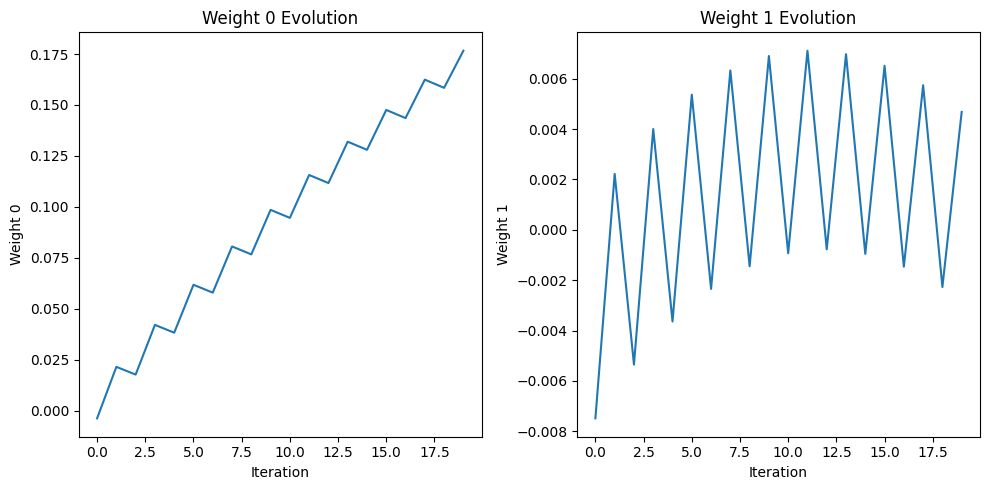

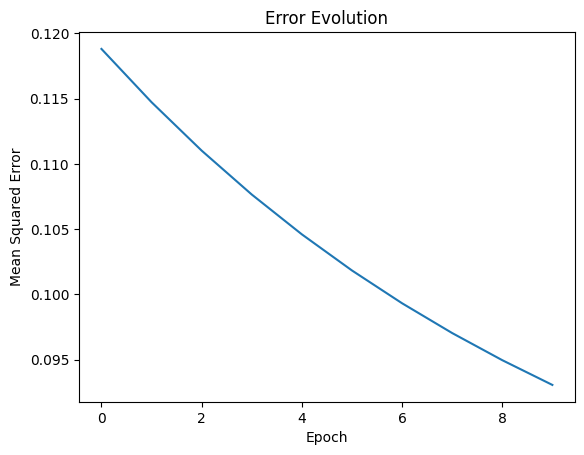

In [ ]:
weights_history, errors = stochastic_gradient_descent(x, y, w, b)

weight_0_history = [wh[0] for wh in weights_history]
weight_1_history = [wh[1] for wh in weights_history]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(weight_0_history)
plt.title("Weight 0 Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight 0")

plt.subplot(122)
plt.plot(weight_1_history)
plt.title("Weight 1 Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight 1")

plt.tight_layout()

plt.figure()
plt.plot(errors)
plt.title("Error Evolution")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()


#Batch gradient descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.5, 2.5])
y = np.array([0.2, 0.9])
w = 0
b = 0
alpha = 0.1

In [ ]:
def batch_gradient_descent(x, y, w, b):
    epoch = 10
    weights_history = []
    errors = []

    for i in range(epoch):
        dw = 0
        db = 0
        error_epoch = 0
        for xi, yi in zip(x, y):
            dw = dw + d_w(xi, yi, w, b, alpha)
            db = db + d_b(xi, yi, w, b, alpha)
            error_epoch += (yi - perceptron(xi, w, b)) ** 2

        w = w + dw
        b = b + db

        weights_history.append((w, b))
        errors.append(error_epoch / len(x))

    print("The final weights are: ", w)
    print("The final bias is: ", b)

    return weights_history, errors

In [ ]:
def d_b(x, y, w, b, alpha):
    y_hat = perceptron(x, w, b)
    db = alpha * (y - y_hat) * y_hat * (1 - y_hat)
    return db

def d_w(x, y, w, b, alpha):
    y_hat = perceptron( x, w, b)
    dw = alpha * (y - y_hat) * y_hat * (1 - y_hat) * x
    return dw

In [ ]:
def perceptron(x, w, b):
    y_in = x * w + b
    y_hat = sigmoid(y_in)
    return y_hat

def sigmoid(y_in):
    y_hat = 1 / (1 + np.exp(-y_in))
    return y_hat

The final weights are:  0.17392015991938922
The final bias is:  0.0071790712081918


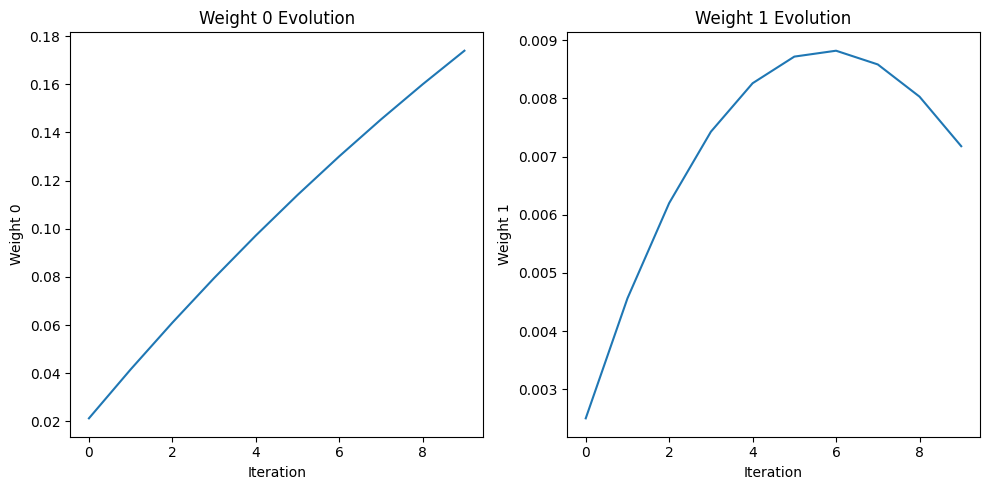

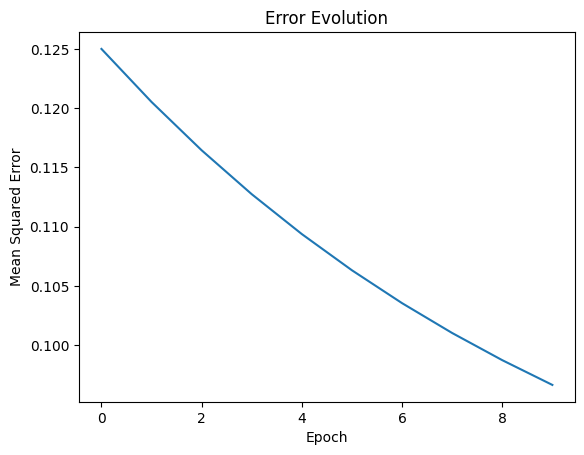

In [ ]:
weights_history, errors = batch_gradient_descent(x, y, w, b)

weight_0_history = [wh[0] for wh in weights_history]
weight_1_history = [wh[1] for wh in weights_history]

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(weight_0_history)
plt.title("Weight 0 Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight 0")

plt.subplot(122)
plt.plot(weight_1_history)
plt.title("Weight 1 Evolution")
plt.xlabel("Iteration")
plt.ylabel("Weight 1")

plt.tight_layout()

plt.figure()
plt.plot(errors)
plt.title("Error Evolution")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

